<a href="https://colab.research.google.com/github/AllysonSimGH/ml-projects/blob/main/end_to_end_dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-end Multi-class Dog Breed classification

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub

## 1. Problem

Identifying the breed of a dog given an image of a dog.

When I'm sitting in a cafe and I take a photo of a dog, I want to know what breed of dog it is.

## 2. Data

The data we're using is from Kaggle's dog breed identification competition

# 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed for each image, Multi-class Log Loss

# 4. Features

We have unstructured data (pictures)
Some info about the data:
* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (These images has labels)
* There are around 10,000+ images in the test sets (these images have no labels, because we'll want to predict them).

In [ ]:
# unzip the uploaded data into Google Drice
#!unzip "/content/drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "/content/drive/MyDrive/Dog Vision/dog-breed-identification-unzip"

### Get our workshpace ready

* Import TensorFlow 2.x ✅
* Import TensorFlow Hub ✅
* Make sure we're using the GPU ✅

In [ ]:
# Inport necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF version", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check for GPU availability
print("GPU", "available (YESSSS!!!)" if tf.config.list_physical_devices("GPU") else "not available :()")


TF version 2.15.0
TF Hub version: 0.15.0
GPU available (YESSSS!!!)


## Getting our data ready (turning it into Tensors)

With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first, Turning our images into Tensors (numerical representations)

Let's start by accessing our data and checking out the labels.

In [ ]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Dog Vision/dog-breed-identification-unzip/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

<Axes: >

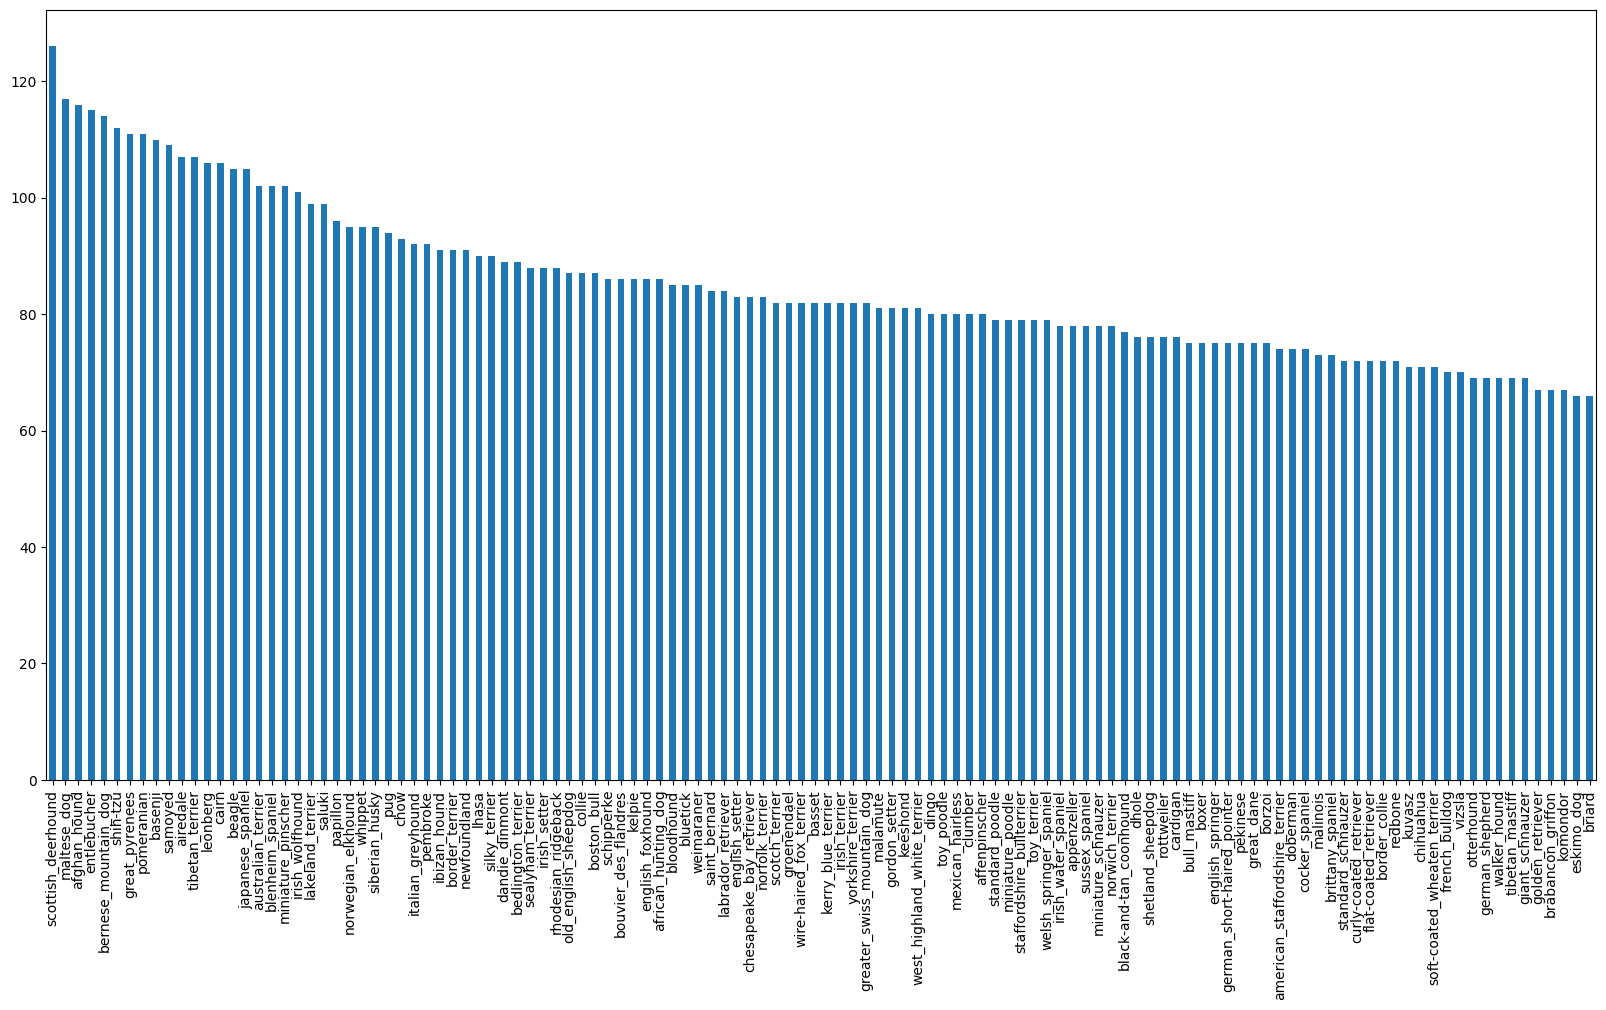

In [ ]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

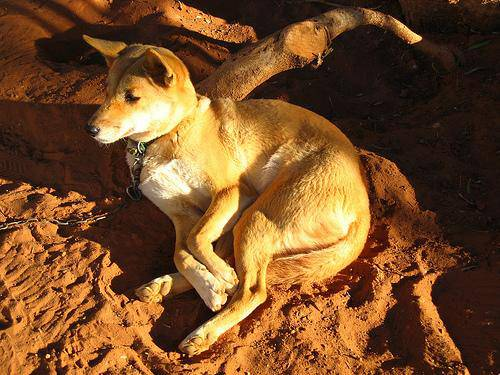

In [ ]:
# Let's view an image
from IPython.display import Image
Image("drive/My Drive/Dog Vision/dog-breed-identification-unzip/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and their labels

Let's get a list of all of our image file pathnames.

In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
# Create pathnames from image ID's - save it to list
filenames = ["drive/MyDrive/Dog Vision/dog-breed-identification-unzip/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10
filenames[:10]

['drive/MyDrive/Dog Vision/dog-breed-identification-unzip/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification-unzip/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification-unzip/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification-unzip/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification-unzip/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification-unzip/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification-unzip/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification-unzip/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification-unzip/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification-unzip/train/0042188c8

In [ ]:
import os
os.listdir("drive/MyDrive/Dog Vision/dog-breed-identification-unzip/train")[:10]

['e6f837210a5b4c4f171b21f3a43ae12b.jpg',
 'e1d0619c08c523d87097109784a1d0dd.jpg',
 'e30db8f52d5fe88e128697d8fbd163e9.jpg',
 'e98505488dfe161e0894e1bce7b5de04.jpg',
 'e5f1325af86723ad733000ca2adbd226.jpg',
 'dcda81d6b22e37e4c0fc36a383a61e73.jpg',
 'e346c77b51b03999cbf7d89ae776e696.jpg',
 'dc58e98a94ff4d49ff7242b5b860f167.jpg',
 'e07277bc6a6a0da06598b3ad43a011b2.jpg',
 'e401d9046968cb01f5bdb97f92e61428.jpg']

In [ ]:
# Check if we have the same file name in our train folder, to make sure we work on the same amount of data
# Check whether number of filenames matches number of actual image files

if len(os.listdir("drive/MyDrive/Dog Vision/dog-breed-identification-unzip/train/")) == len(filenames):
  print("Filenames match actual amount of files!!! Proceed.")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!!! Proceed.


In [ ]:
# One more check
filenames[900]

'drive/MyDrive/Dog Vision/dog-breed-identification-unzip/train/16052ac2a6ff7f1fbbc85885d2a7c467.jpg'

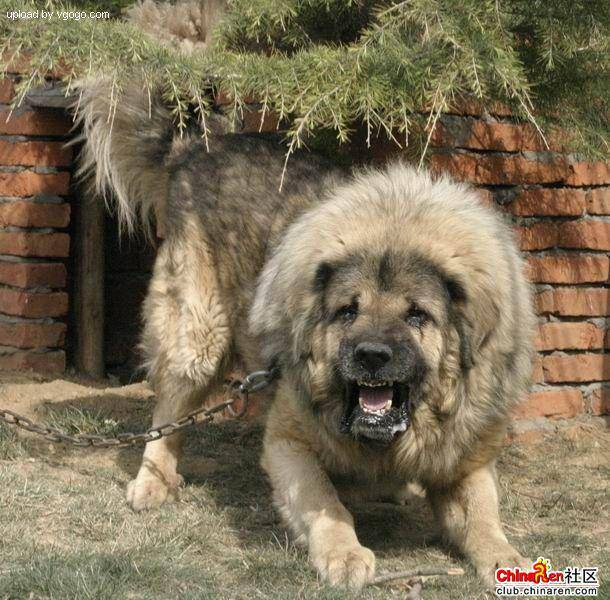

In [ ]:
Image(filenames[9000])

In [ ]:
labels_csv["breed"][9000]

'tibetan_mastiff'

Since we've now got our training image filepaths in a list, let's prepare our labels.

In [ ]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
# labels = labels_csv["breed"].to_numpy
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not matches number of filenames, check data dir")

Number of labels matches number of filenames!


In [ ]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)


120

In [ ]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# Example: Turning boolean array into integers
print(labels[0])  # original laabel
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
filenames[:10]

['drive/MyDrive/Dog Vision/dog-breed-identification-unzip/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification-unzip/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification-unzip/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification-unzip/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification-unzip/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification-unzip/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification-unzip/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification-unzip/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification-unzip/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification-unzip/train/0042188c8

### Creating our own validation set
Since the dataset from Kaggle doesn't come with a validation set

In [ ]:
# Setup X & y variables
X = filenames
y = boolean_labels

We're going to start off experimenting with ~1000 images and increase as needed

In [ ]:
# Set number of images to use for exprimenting
NUM_IMAGES = 1000 #@param{type:"slider", min:1000, max:10000, step:1000}

In [ ]:
# User Scikit-learn to split data
from sklearn.model_selection import train_test_split

# Split them into training and valication of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
# Let's have a ceez at the training data
X_train[:5], y_train[:2]

(['drive/MyDrive/Dog Vision/dog-breed-identification-unzip/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog Vision/dog-breed-identification-unzip/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/Dog Vision/dog-breed-identification-unzip/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/Dog Vision/dog-breed-identification-unzip/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/Dog Vision/dog-breed-identification-unzip/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, Fal

## Preprocessing Images (turning images into Tensors)

To preprocess our images into Tensors we're going to write a function which does a few things:
1. Take an image filepath as input (`filenames`)
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Resize the `image` to be a shapre of (224, 224)
5. Return the modified `image`

Before, we do, let's see what importing an image looks like.

To read:

https://www.tensorflow.org/guide/data

https://www.tensorflow.org/tutorials/load_data/images

In [ ]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape # size(X, Y), color channel (read,green,blue) values between 0-255

(257, 350, 3)

In [ ]:
image.max(), image.min()

(255, 0)

In [ ]:
image[:2]

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)

In [ ]:
# Turning image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

Now we've seen what an imager looks like as a Tensor, let's make a function to preprocess them.
1. Take an image filepath as input (`filenames`)
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalized image (convert 0-255 to 0-1)
4. Resize the `image` to be a shapre of (224, 224)
5. Return the modified `image`

In [ ]:
# Define image size
IMG_SIZE = 128

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """

  # Read an an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 color channels (RGB)
  image = tf.image.decode_jpeg(image, channels=3)
  # Normalization: Convert the color channel values from 0-255 to 0-1 values - this makes computing more efficient
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

# Turning out data into batches

Why?

*   TensorFlow likes to see data in batch (minibatch) - small portion of a data, 32 is the default batch size
*   Let's say you're trying to process 10,000+ images in one go... they all might not fit into memory
* You can manually adjust the batch size if needed

In order to user TensorFlow effectively, we need our data in the form of Tensor tuples which look like this:
`(image, label)`






In [ ]:
# Create a simple funtion to return a tuple (image, label) of tensor
def get_image_label(image_path, label):
  """
  Takes an image file path and the associated label, processes the image and reutrns a tuple of (image, label)
  """

  image = process_image(image_path)

  return image, label

In [ ]:
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
 array([[[0.27929032, 0.4751063 , 0.2795834 ],
         [0.27585176, 0.46525738, 0.26177704],
         [0.3406097 , 0.52753276, 0.30271655],
         ...,
         [0.2751685 , 0.49869794, 0.29869792],
         [0.28818935, 0.51209253, 0.31603253],
         [0.29382864, 0.52127963, 0.33304432]],
 
        [[0.21575989, 0.41348663, 0.2655423 ],
         [0.29273564, 0.48136288, 0.32789788],
         [0.3189494 , 0.505239  , 0.33296594],
         ...,
         [0.25343138, 0.47303924, 0.28489584],
         [0.2582874 , 0.4802207 , 0.2991575 ],
         [0.27520525, 0.49873468, 0.32627755]],
 
        [[0.1963847 , 0.39246315, 0.28385404],
         [0.2122244 , 0.4047182 , 0.29629302],
         [0.22513789, 0.41602883, 0.29334742],
         ...,
         [0.22732845, 0.44489893, 0.27724636],
         [0.23500296, 0.45068926, 0.2900581 ],
         [0.25955886, 0.47524515, 0.32041976]],
 
        ...,
 
        [[0.13864364, 0.17785932

Now we've got a way to turn our data into tuples of Tensors in the form: `(image, label)`, let's make a function to turn all of our data `(X,y)` into batches!

In [ ]:
# Define the batsh size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # onlly filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validataion data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),  # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffle the full images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
    return data_batch


In [ ]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)


Creating training data batches...
Creating validataion data batches...


In [ ]:
# Check out the different atributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Our data is now in batches, these can be a little hard to understand/comporehend, let's visualize it

In [ ]:
import matplotlib.pyplot as plt

# create a function for vieweing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """

  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5,5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    # plt.axis("off")

In [ ]:
unique_breeds[y[0].argmax()]

'boston_bull'

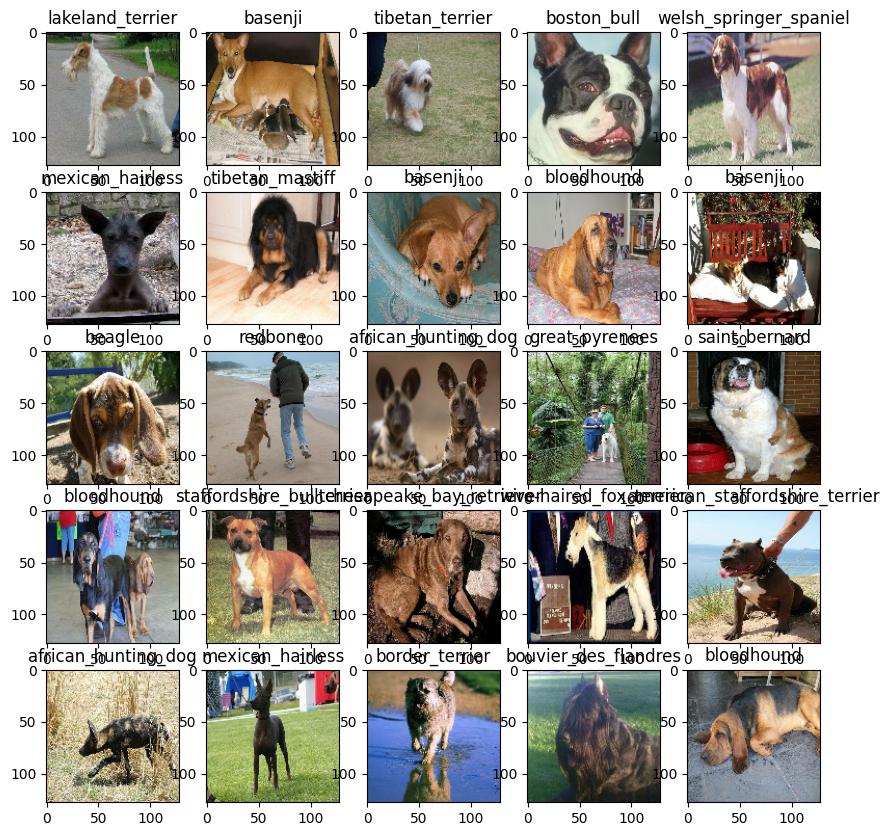

In [ ]:
# Now let's visualize the data in a training batch
# First unbatch the images and then only print the image
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels
show_25_images(train_images, train_labels)

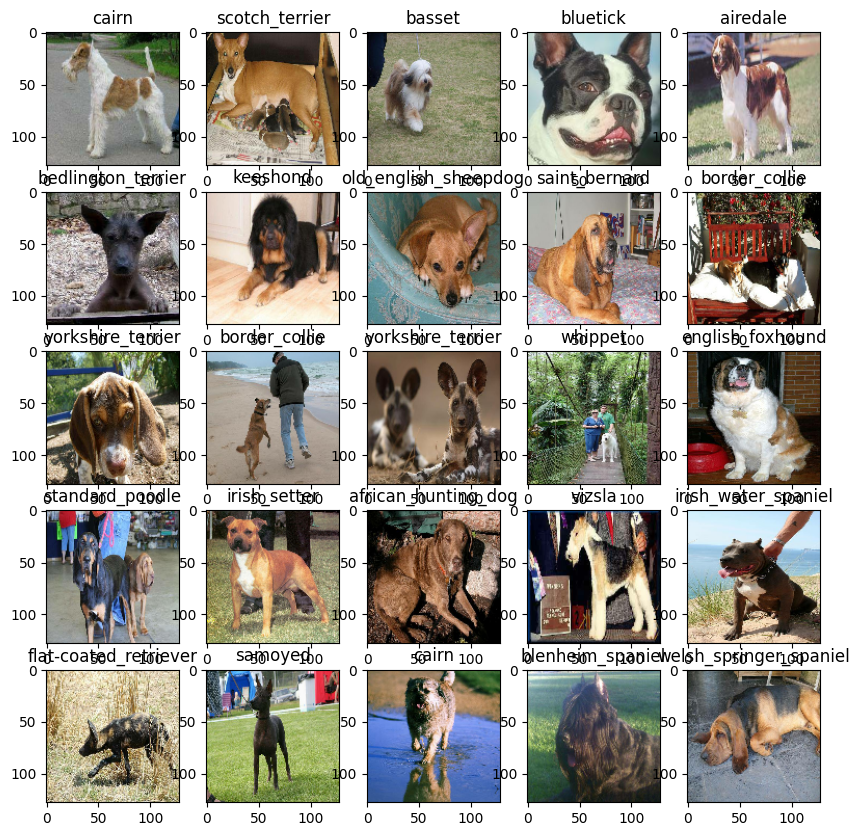

In [ ]:
# Let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(train_images, val_labels)

## Building a model

- use transfer learning,

There are a few things we need to define
* The input shape (our images shape, in the form of Tensors)
* The output shape (image labels, in the form of Tensors)
* The URL of the model we want to use

(Non-technical) How Machines Learn by GCP Grey: https://www.youtube.com/watch?v=R9OHn5ZF4Uo

(Technical) Deep Learning series by 3Blue1Brown: https://www.youtube.com/watch?v=aircAruvnKk

From Tensorflow Hub:
"https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2"

From TensorFlow Keras:
https://www.tensorflow.org/guide/keras/sequential_model

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, color channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub = a library for reusable machine learning modules
MODEL_URL = "https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2"

Now we've got our unputs, outputs and model reading to go. Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a Keras model in sequential fashion: do this first, and that, and then that
* Compiles the model (says it should be evaluated and improved)
* Buils the model (tells the model the input shape it'll be getting)
* Returns the model

All of these steps can be found here:
https://www.tensorflow.org/guide/keras

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL),   # Layer 1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE, # We want the output to be in the shape for our example: 120 types of dog breeds
                            activation="softmax")   # Layer 2(output layer), sigmoid (binary classificaton), softmax (multi-class classification)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # How to choose loss function for deep learning, depends on the classfication problem (binary or multi-class)
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model


In [ ]:
model = create_model()
model.summary()

Building model with: https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              1692489   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 1812729 (6.92 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 1692489 (6.46 MB)
_________________________________________________________________


### Creating callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

* Avoid overfitting

We'll create two callbacks, one for **TensorBoard** which helps track our models progress and another for early stopping which prevents our model from training too long

### TensorBoard Callback

To setup a TensorBoard callback, we need to do 3 things:
1. Load the TensorBoard notebook extension
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function
3. Visualize our models training loggs with the `tensorboard` magic function (we'll do this after model training)


In [ ]:
# Load TensorBoard into notebook
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Dog Vision/dog-breed-identification-unzip/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)


# Create early stopping callback - prevents overfitting

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3,
                                                  )

 ## Training a model (on subset of data)

 Our first model is only going to train on 1000 images, to make sure everything is working

 epochs - how many passes of our data do we want the model to go through
 * 100 epochs - give the model 100 chance to look through the data, to see how well the model is performed

In [ ]:
NUM_EPOCHS = 100 #@param{type:"slider", min:10, max:100, step:10}

In [ ]:
# Check to make sure we're still running on a GPU
print("GPU", "available (YES!!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :()")


GPU available (YES!!!!!!)


Let's create a function which trains a model

* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing it the training data, validation data, number of ipochs to train for (`NUM_EPOCHS`) and the callbacks we'd like to use
* Return the model

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create a new TensorBoard session everytime we train a model - to track model's performance
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # once an epoch
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [ ]:
# Fit the model to the data, 25 instances (steps) because we have 1000 samples, 800 for test and 200 for validataion 800/32(batch) = 25
model = train_model()

Building model with: https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2
Epoch 1/100
25/25 [==============================] - 14s 273ms/step - loss: 5.5937 - accuracy: 0.0288 - val_loss: 4.6222 - val_accuracy: 0.1050
Epoch 2/100
25/25 [==============================] - 2s 89ms/step - loss: 2.3715 - accuracy: 0.4400 - val_loss: 3.7146 - val_accuracy: 0.1850
Epoch 3/100
25/25 [==============================] - 2s 97ms/step - loss: 1.0837 - accuracy: 0.7837 - val_loss: 3.4525 - val_accuracy: 0.2250
Epoch 4/100
25/25 [==============================] - 2s 88ms/step - loss: 0.5198 - accuracy: 0.9438 - val_loss: 3.4734 - val_accuracy: 0.2300
Epoch 5/100
25/25 [==============================] - 3s 116ms/step - loss: 0.2678 - accuracy: 0.9912 - val_loss: 3.4430 - val_accuracy: 0.2400
Epoch 6/100
25/25 [==============================] - 3s 129ms/step - loss: 0.1651 - accuracy: 1.0000 - val_loss: 3.4662 - val_accuracy: 0.2250
Epoch

**Question:** It looks like our model is overfitting because it's performing far better on the training dataset than the validation dataset
What are the ways to prevent overfitting in deep learning neural networks?

**Note:** Overfitting is to begin with is a good thing! It means our model is learning!!!

### Checking the TensorBoard logs

the TensorBoard magic function(`%tensorboard`) will access the logs directory we created earlier and visualize its content


In [ ]:
%tensorboard --logdir drive/MyDrive/Dog\ Vision/dog-breed-identification-unzip/logs

# Making and evaluation prediction using a trained model

In [ ]:
# Make  prediction on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions # shape of 200 samples for validation data and 120 dog breeds
# returns the associated probability, what our model thinks a certain image is

7/7 [==============================] - 30s 4s/step


array([[8.4359618e-03, 7.8422780e-04, 2.1902611e-02, ..., 1.7797917e-03,
        1.3701648e-03, 1.5726389e-02],
       [1.5264242e-03, 3.2986628e-04, 2.4073331e-02, ..., 2.7221223e-04,
        5.1912363e-03, 3.0362315e-04],
       [4.5174500e-05, 9.3705075e-06, 7.6192943e-04, ..., 2.4789591e-01,
        2.8473110e-05, 1.8482364e-03],
       ...,
       [2.5092092e-04, 1.8363124e-04, 8.1281394e-02, ..., 1.6288208e-05,
        1.7660081e-04, 7.8101904e-04],
       [7.1974250e-04, 1.7728661e-03, 1.5992951e-02, ..., 7.7873101e-03,
        5.8698230e-03, 2.1142901e-03],
       [5.0968910e-04, 2.2142681e-03, 8.4188249e-04, ..., 3.1413257e-03,
        1.6893906e-03, 3.2850352e-04]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

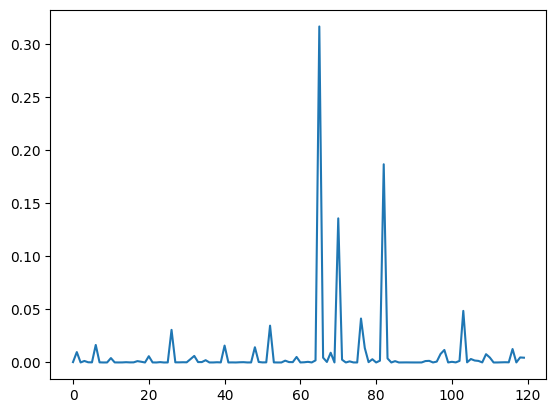

In [ ]:
plt.plot(predictions[0])

In [ ]:
np.sum(predictions[0])

0.9999999

In [ ]:
# First prediction
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[0])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}" )

[2.08238380e-05 1.42957739e-04 2.51510879e-03 9.84157086e-04
 2.98556086e-04 5.41043049e-03 1.86364865e-03 2.15936569e-04
 3.86944943e-04 8.82655964e-04 1.36134952e-01 1.62255194e-04
 6.12948230e-03 9.97569179e-04 9.84574389e-03 1.40330871e-04
 4.70837485e-03 1.44922771e-04 8.51548029e-05 4.28542480e-05
 1.53965768e-04 1.39445928e-03 1.03548125e-04 5.96662471e-03
 3.48952375e-02 8.77425298e-02 7.91434839e-04 5.54651138e-04
 6.82173632e-05 2.71614548e-02 9.38571702e-06 7.22594326e-03
 2.60818703e-03 5.91374701e-03 5.85628266e-04 4.57004504e-03
 2.97142100e-03 1.54864497e-03 8.96140293e-04 1.98781118e-03
 1.02240453e-03 1.02943573e-02 2.56191101e-03 2.07423000e-03
 3.15151387e-03 5.02929138e-03 1.22423051e-02 4.38140193e-03
 1.15712881e-02 1.97185180e-03 3.10341176e-03 9.04383312e-04
 9.88068292e-04 3.78784202e-02 1.47124403e-04 2.67440861e-04
 8.90242402e-04 6.38138910e-04 8.42234492e-03 3.98958975e-04
 9.75894101e-04 6.35885913e-03 3.60833859e-04 2.83787656e-03
 5.89471357e-03 1.321528

Having the above functionaility is great but we want to be able to do it at scale

And it would be even better if we could see the image the prediction is being made on!

**Note:** Prediction probabilities are also known as confidence levels.



In [ ]:
# Turn prediction probability (also calls confidence interval) into their respective label (easier to understand)
def get_pred_label(predictions_probabilities):
  """
  Turns an array of prediction probabilities into a label
  """
  return unique_breeds[np.argmax(predictions_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

'maltese_dog'

Now, since our validation is still in a batch dataset, we'll have to unbatchify it to make predictions on the validation images and then compare those predictions to the validation labels (truth labels)

In [ ]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# unbatch val_data --> to get the images, compare prediction labels to the actual label
# Create a function to unbatch a batch dataset

def unbatchify(data):
  """
  Takes a batched dataset (image, label) Tensors and returns separate arrays of images and labels.
  """

  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])

  return images, labels

# Unbatchify the jvalidatiaon data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.25828475, 0.36198825, 0.24389817],
         [0.39360544, 0.3418826 , 0.30183154],
         [0.8296768 , 0.7504122 , 0.74760556],
         ...,
         [0.8228947 , 0.8611053 , 0.8719636 ],
         [0.76902866, 0.8160875 , 0.8079686 ],
         [0.8183106 , 0.82737565, 0.84341663]],
 
        [[0.30484715, 0.29425842, 0.2039199 ],
         [0.4352226 , 0.37971696, 0.31883615],
         [0.8593526 , 0.80739874, 0.77293175],
         ...,
         [0.85530514, 0.89059925, 0.917223  ],
         [0.80846506, 0.8516023 , 0.8737746 ],
         [0.7754192 , 0.8053707 , 0.84239584]],
 
        [[0.75496686, 0.6921665 , 0.66526437],
         [0.807427  , 0.804948  , 0.7710658 ],
         [0.9814564 , 0.9935267 , 0.971697  ],
         ...,
         [0.91192657, 0.94484705, 0.9793709 ],
         [0.8952671 , 0.9312506 , 0.98800606],
         [0.8093318 , 0.85525966, 0.91700304]],
 
        ...,
 
        [[0.45503026, 0.4585416 , 0.41656855],
         [0.5492001 , 0.5392863 , 0.49725

In [ ]:
get_pred_label(val_labels[0])

'affenpinscher'

Now we've got ways to get:
* Prediction labels
* Validation labels (truth labels)
* Validation images

Let's make some function to make these all a bit more visual.

We'll create a function which:
* Takes an array of prediction probabilities, an array of truth labels and an array of images and integers.
* Convert the prediction probabilities to a predicted label.
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot

In [ ]:
def plot_pred(predictions_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = predictions_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending of if the prediction is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = "red"

  # Change plot title to be predicted probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                   np.max(pred_prob)*100,
                                   true_label),
            color=color)

<function matplotlib.pyplot.show(close=None, block=None)>

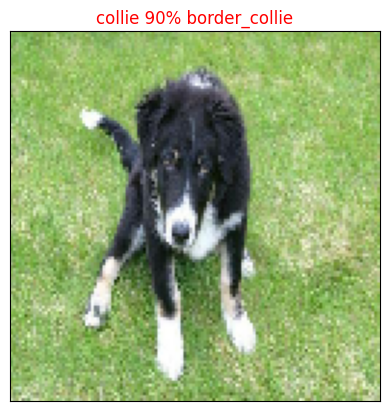

In [ ]:
num_images = 10
i_multiplier = 0
for index in range(num_images):
  plot_pred(predictions_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=index+i_multiplier)

plt.show

The accuracy on the train image is still rather low, that's why we see that there are still a lot of wrong prediction

NOw we've got one function to visualize our models top prediction, let's make another view our models top 10 prediftion

This function will:
* Take an input of prediction probabilities array and a ground truth array and an integer
* Find the prediction using `get_pred_label()`
* Find the top 10:
  * Prediction probabilities indexes
  * Prediction probabilities values
  * Prediction labels
* Plot the top 10 prediction probability values and labels, coloring the true label green

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Fidn the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
            labels=top_10_pred_labels,
            rotation="vertical")

  # Change color of the true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

In [ ]:
# Top 10 indexes of prediction 0
predictions[0][predictions[0].argsort()[-10:][::-1]]

array([0.3162659 , 0.18656343, 0.13565366, 0.04856279, 0.04136783,
       0.0346631 , 0.03069906, 0.01650227, 0.01590395, 0.01434291],
      dtype=float32)

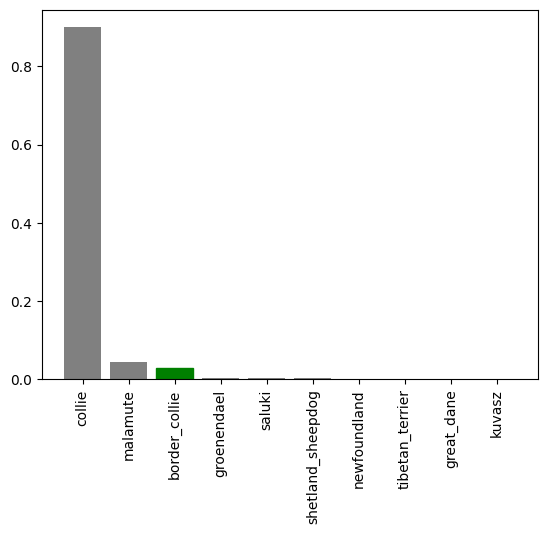

In [ ]:
index = 9
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=index)

Now we've got some function to help us visualize our predictions and evaluate our model, let's check out a few.

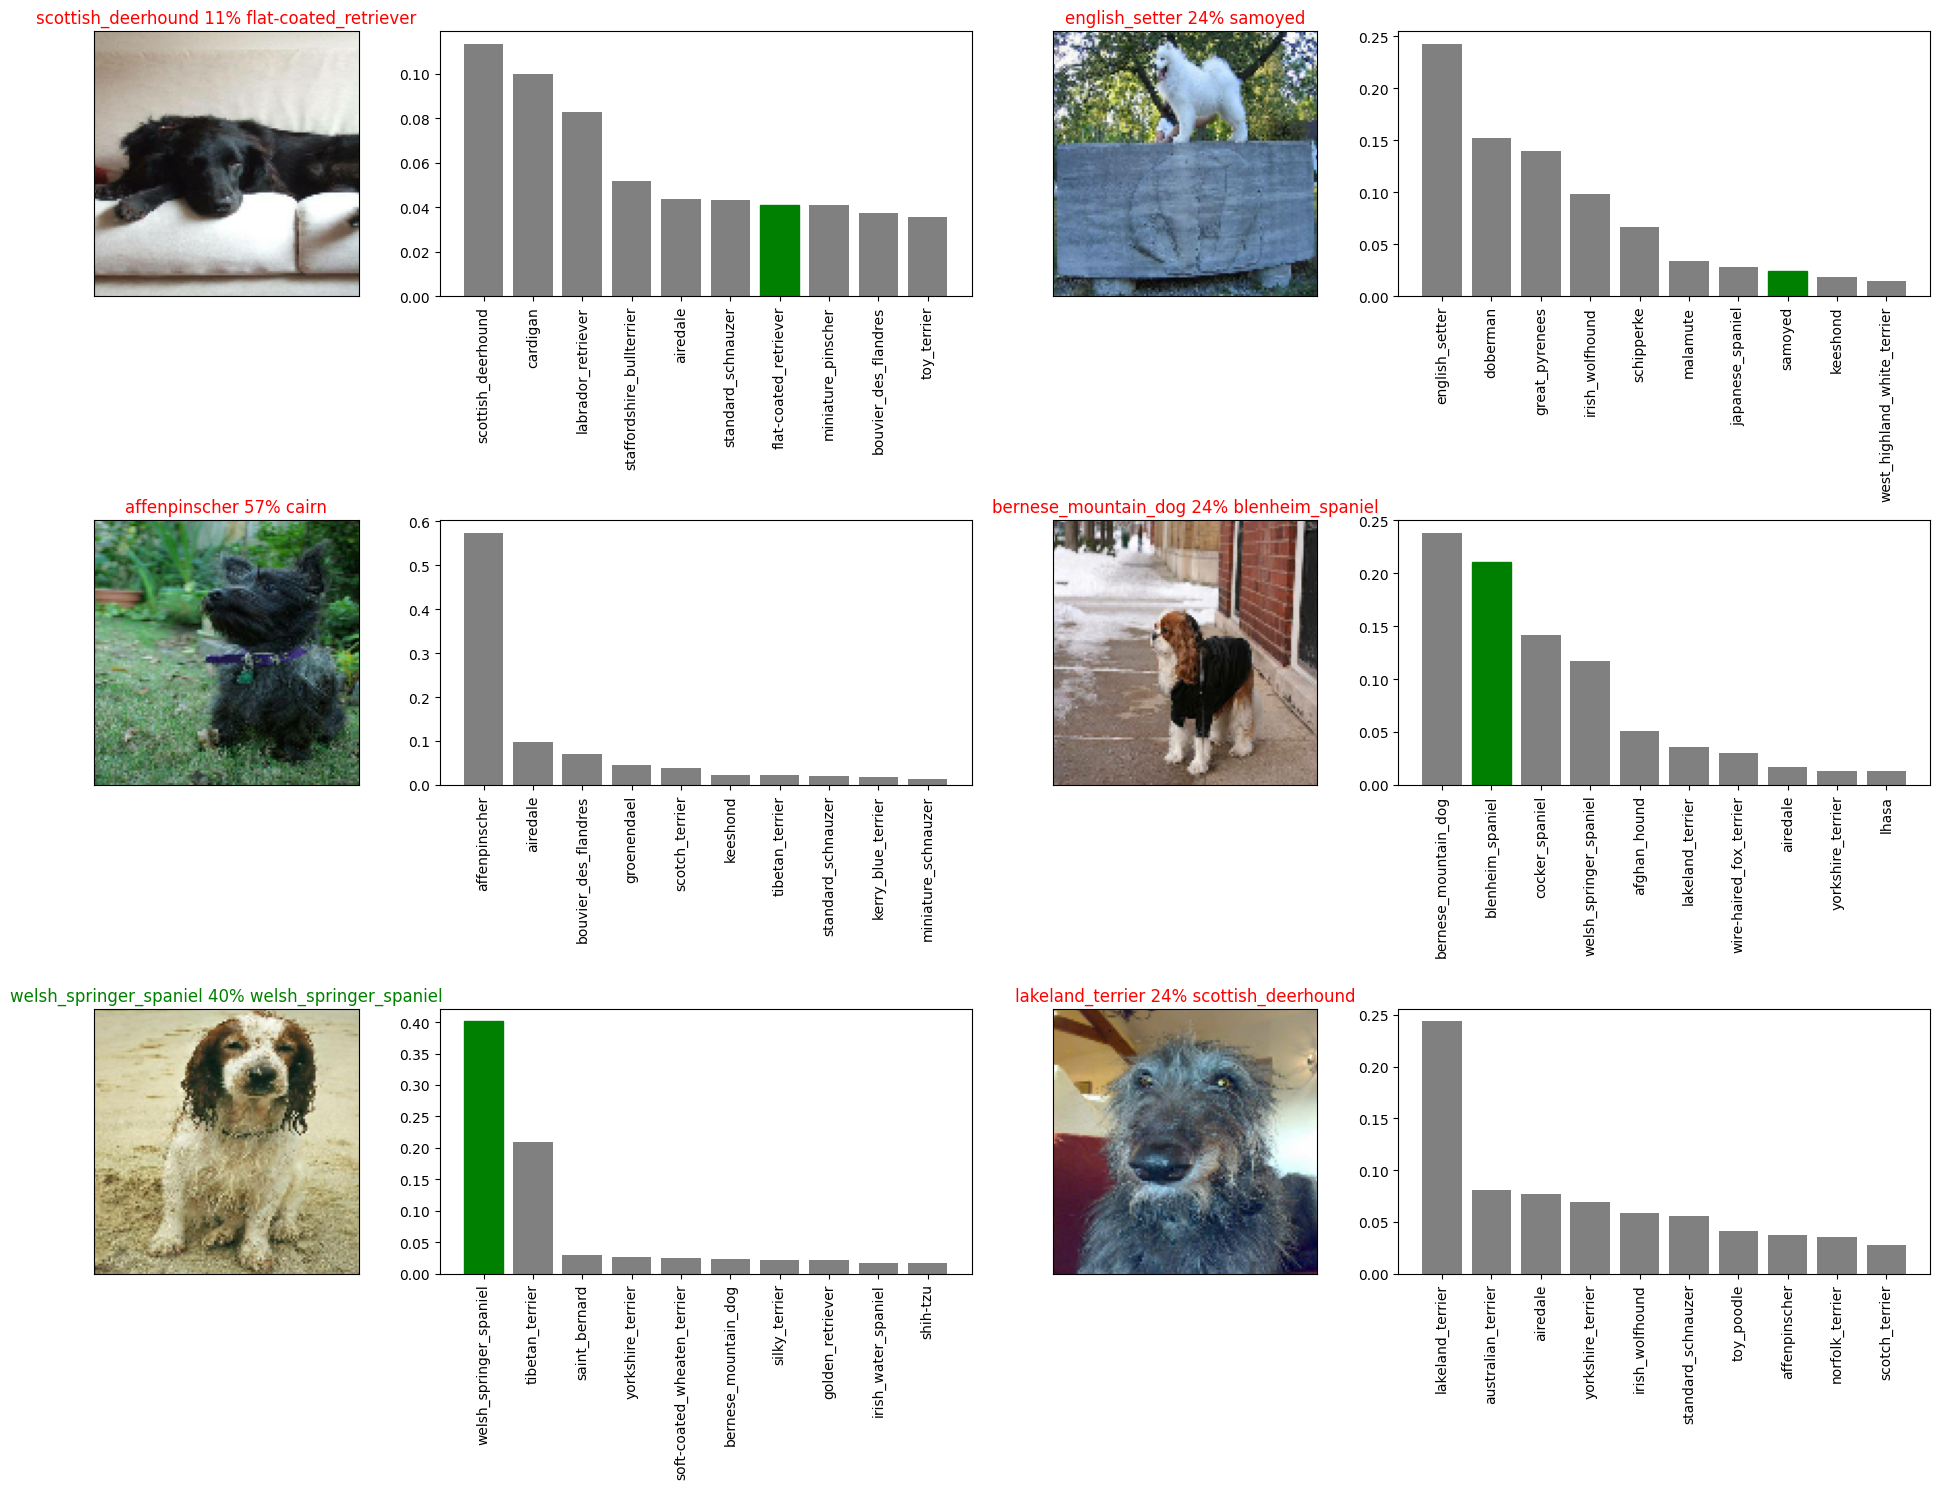

In [ ]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(predictions_probabilities=predictions,
              labels=val_labels,
              images=val_images,
              n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
  plt.tight_layout(h_pad=1.0)
plt.show()

**Challenge:** How would you create a confusion matrix with our models and true labels?

## Saving and reloading a trained model


In [ ]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string)
  """
  # Create a model directory. pathname with current time
  modeldir = os.path.join("drive/My Drive/Dog Vision/dog-breed-identification-unzip/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
# Create a function to load a model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

Now we've got functions to save and load a trained model, let's make sure they work

In [ ]:
# Save our m,odel trained on 1000 images
save_model(model, suffix="1000-images-mobilenitv2-Adam")

Saving model to: drive/My Drive/Dog Vision/dog-breed-identification-unzip/models/20240110-11361704886575-1000-images-mobilenitv2-Adam.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/My Drive/Dog Vision/dog-breed-identification-unzip/models/20240110-11361704886575-1000-images-mobilenitv2-Adam.h5'

In [ ]:
# Load a trined model
loaded_1000_image_model = load_model("drive/My Drive/Dog Vision/dog-breed-identification-unzip/models/20240110-10511704883886-1000-images-mobilenitv2-Adam.h5")

Loading saved model from: drive/My Drive/Dog Vision/dog-breed-identification-unzip/models/20240110-10511704883886-1000-images-mobilenitv2-Adam.h5


In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 0s 69ms/step - loss: 3.4813 - accuracy: 0.2300


[3.4812891483306885, 0.23000000417232513]

In [ ]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 57ms/step - loss: 3.5886 - accuracy: 0.2350


[3.58860445022583, 0.23499999940395355]

## Training a big dog model on the full data!!

In [ ]:
len(X), len(y) # file names and label of our original data

(10222, 10222)

In [ ]:
# Create a data batch with the full data set
full_data = create_data_batches(X, y)

Creating training data batches...


In [ ]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# Create a model for full model
full_model = create_model()

Building model with: https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2


In [ ]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

**Note:** Runing this cell below will take a while (maybe up to 30mins for the first epoch) because the GPU we're using in the runtime has to load all of the images into memory

In [ ]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Epoch 1/100
320/320 [==============================] - 707s 2s/step - loss: 2.8755 - accuracy: 0.3292
Epoch 2/100
320/320 [==============================] - 23s 71ms/step - loss: 1.6456 - accuracy: 0.5502
Epoch 3/100
320/320 [==============================] - 23s 71ms/step - loss: 1.2750 - accuracy: 0.6343
Epoch 4/100
320/320 [==============================] - 24s 74ms/step - loss: 1.0392 - accuracy: 0.6985
Epoch 5/100
320/320 [==============================] - 25s 79ms/step - loss: 0.8625 - accuracy: 0.7468
Epoch 6/100
320/320 [==============================] - 24s 74ms/step - loss: 0.7140 - accuracy: 0.7920
Epoch 7/100
320/320 [==============================] - 25s 77ms/step - loss: 0.5953 - accuracy: 0.8327
Epoch 8/100
320/320 [==============================] - 22s 68ms/step - loss: 0.5036 - accuracy: 0.8571
Epoch 9/100
320/320 [==============================] - 22s 70ms/step - loss: 0.4274 - accuracy: 0.8852
Epoch 10/100
320/320 [==============================] - 23s 71ms/step - lo

Saving model to: drive/My Drive/Dog Vision/dog-breed-identification-unzip/models/20240110-11311704886279-full-image-set-mobilenetv2-Adam.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/My Drive/Dog Vision/dog-breed-identification-unzip/models/20240110-11311704886279-full-image-set-mobilenetv2-Adam.h5'

In [ ]:
loaded_full_model = load_model("drive/MyDrive/Dog Vision/dog-breed-identification-unzip/models/20240110-11311704886279-full-image-set-mobilenetv2-Adam.h5")

Loading saved model from: drive/MyDrive/Dog Vision/dog-breed-identification-unzip/models/20240110-11311704886279-full-image-set-mobilenetv2-Adam.h5


In [ ]:
len(X)

10222

## Making predictions on the test dataset

Since our model has been trained on images int he form of Tensor batches, to make predictions on the test data, wel'll have to get it into the same format

Luckily we created `create_data-batches()` earlier which can take a list of filenames as input and convert them into Tensor batches.

To make predictions on the test data, we'll have to:
* Get the test image filenames
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test-data` parameter to `True` since the test data doesn't have labels
* Make a predictions array by passsing the test batches to the `predict()` method called on our model

In [ ]:
# Load test image filenames
test_path = "drive/MyDrive/Dog Vision/dog-breed-identification/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:5]

['drive/MyDrive/Dog Vision/dog-breed-identification/test/eb641b6721c3d967b8e92313c943eba9.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification/test/e8b49a4b2c22d3c5cb3c88c61654e991.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification/test/f0d2e080797f5e1f54bfa26bda41887b.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification/test/f14672c3ea8086560de6b7e79f9b90d1.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification/test/edbff7f90e9b8f5dd4cf25ce67fa2efa.jpg']

In [ ]:
# Convert the filenames into test data batches
len(test_filenames)

10357

In [ ]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [ ]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None)>

***Note:* Calling `predict()` on our full model and passing it the test data batch will take a long time to run (about an hour)

In [ ]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                              verbose=1)

324/324 [==============================] - 170s 508ms/step


In [ ]:
# Save predictions (NumPy array) to csv file (for access later)
np.savetxt("drive/My Drive/Dog Vision/dog-breed-identification-unzip/preds_array.csv", test_predictions, delimiter=",")

In [ ]:
# Load predictions (NumPy array) from csv file
test_predictions = np.loadtxt("drive/My Drive/Dog Vision/dog-breed-identification-unzip/preds_array.csv", delimiter=",")

In [ ]:
test_predictions[:10]

array([[5.15293728e-08, 1.48796774e-13, 6.92009113e-13, ...,
        1.40126660e-11, 9.41619248e-07, 3.33781050e-12],
       [4.54989258e-12, 7.10916742e-12, 1.76036856e-18, ...,
        1.59341229e-14, 8.17422317e-16, 1.04815364e-17],
       [2.53945576e-08, 1.39369565e-08, 3.00471072e-07, ...,
        3.87583909e-10, 2.90660118e-08, 1.65410887e-03],
       ...,
       [6.43027909e-10, 2.94982105e-09, 2.99095555e-05, ...,
        8.38944688e-03, 4.11889488e-07, 8.30845781e-10],
       [9.34853323e-13, 1.12039629e-07, 1.96729292e-16, ...,
        5.55481285e-15, 2.66024935e-09, 1.13192788e-12],
       [1.77133286e-09, 1.64433675e-11, 3.38953786e-14, ...,
        1.67969976e-08, 1.27855651e-06, 6.40535120e-07]])

In [ ]:
test_predictions.shape

(10357, 120)

## Preparing test dataset predictions for Kaggle

Looking at the Kaggle's sample submission, we find that it wants our models prediction probability outputs in a DataFrame with an ID and a column for each different dog breed.

www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

To get the data in this format, we'll:
* Create a pandas DataFrame with an ID column as well as a column for each dog breed
* Add data to the ID column by extrating the test image ID's from their filepaths
* Add data (the prediction probabilities) to each of the dog breed columns
* Export the DataFrame as a CSV to submit it to Kaggle

In [ ]:
# Create a pandas DataFrame with an empty column
pred_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
pred_df

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [ ]:
test_filenames[:5]
test_path

'drive/MyDrive/Dog Vision/dog-breed-identification/test/'

In [ ]:
# Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
pred_df["id"] = test_ids

In [ ]:
pred_df.head()

id affenpinscher afghan_hound  \
0  eb641b6721c3d967b8e92313c943eba9           NaN          NaN   
1  e8b49a4b2c22d3c5cb3c88c61654e991           NaN          NaN   
2  f0d2e080797f5e1f54bfa26bda41887b           NaN          NaN   
3  f14672c3ea8086560de6b7e79f9b90d1           NaN          NaN   
4  edbff7f90e9b8f5dd4cf25ce67fa2efa           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [ ]:
# Add the prediction probabilities to each dog breed column
pred_df[list(unique_breeds)] = test_predictions

In [ ]:
pred_df.head()

id  affenpinscher  afghan_hound  \
0  eb641b6721c3d967b8e92313c943eba9   5.152937e-08  1.487968e-13   
1  e8b49a4b2c22d3c5cb3c88c61654e991   4.549893e-12  7.109167e-12   
2  f0d2e080797f5e1f54bfa26bda41887b   2.539456e-08  1.393696e-08   
3  f14672c3ea8086560de6b7e79f9b90d1   9.189933e-03  1.588593e-07   
4  edbff7f90e9b8f5dd4cf25ce67fa2efa   4.194984e-05  2.287311e-10   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         6.920091e-13  1.824242e-08                    1.203292e-07   
1         1.760369e-18  8.128735e-15                    2.795209e-17   
2         3.004711e-07  8.319161e-11                    1.882217e-15   
3         1.434577e-11  9.226634e-09                    1.386405e-07   
4         1.553415e-10  2.642901e-11                    6.257418e-06   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  1.558027e-13        1.914566e-11  7.513567e-07  1.315309e-01  ...   
1  4.835164e-17        1.957892e-13  1.124890e-18  2.986789e-17  ...   
2  3.236693e-10        9.084396e-01  5.860568e-14  6.217618e-12  ...   
3  6.042679e-06        4.091476e-09  2.921792e-06  3.160882e-07  ...   
4  4.009150e-04        3.921563e-11  7.126136e-05  5.106622e-05  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  1.186620e-08  2.180934e-06  4.245275e-09  4.596163e-04  3.483569e-07   
1  7.660201e-13  1.459849e-16  1.932272e-19  1.053842e-19  3.466262e-14   
2  1.499945e-08  2.115198e-10  1.122927e-08  1.601094e-14  1.684311e-12   
3  2.766420e-07  2.956219e-08  1.620801e-09  3.570564e-08  7.023988e-07   
4  1.284275e-06  6.503689e-06  9.918263e-14  5.932610e-09  3.864077e-09   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            8.103498e-03                 1.317156e-12  1.401267e-11   
1            8.110584e-15                 9.360964e-13  1.593412e-14   
2            1.548218e-06                 9.106785e-10  3.875839e-10   
3            9.045790e-06                 1.921856e-11  2.554377e-06   
4            3.454182e-06                 1.160142e-09  3.553312e-08   

   wire-haired_fox_terrier  yorkshire_terrier  
0             9.416192e-07       3.337810e-12  
1             8.174223e-16       1.048154e-17  
2             2.906601e-08       1.654109e-03  
3             1.345611e-07       5.994428e-07  
4             7.274885e-10       7.196864e-07  

[5 rows x 121 columns]

In [ ]:
pred_df.to_csv("drive/MyDrive/Dog Vision/dog-breed-identification-unzip/full_model_prediction_submission_1_mobilenetV2.csv", index=False)

## Making prediction on custom images

To make predictions on custom images, we'll:
* Get the filepaths of our own images.
* Turn the filepaths into data batches using `create_data_batches`. And since our custom images won't have labels, we set the `test_data` parameter to `True`
* Pass the custom image data batch to our model's `predict()` method
* Convert the prediction output probabilities to predictions labels
* Compare the predicted labels to the custom images

In [ ]:
# Get custom image filepaths
custom_path = "drive/MyDrive/Dog Vision/dog-breed-identification-unzip/my-dog-photos/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_image_paths[:3]

['drive/MyDrive/Dog Vision/dog-breed-identification-unzip/my-dog-photos/dog-photo-3.jpeg',
 'drive/MyDrive/Dog Vision/dog-breed-identification-unzip/my-dog-photos/dog-photo-2.jpeg',
 'drive/MyDrive/Dog Vision/dog-breed-identification-unzip/my-dog-photos/dog-photo-1.jpeg']

In [ ]:
# Turn custom images into batch datasets
custom_data = create_data_batches(custom_image_paths[:3], test_data=True)
custom_data

Creating test data batches...


<_BatchDataset element_spec=TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None)>

In [ ]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 1s 764ms/step


In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['borzoi', 'chow', 'great_dane']

In [ ]:
# Get custom images (our unbatchify() function won't work since there aren't labels... maybe we could fix that later)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

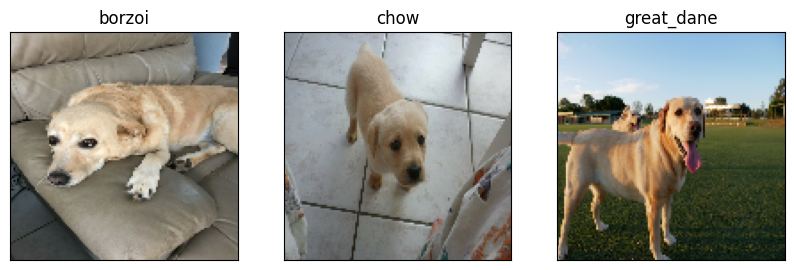

In [ ]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, len(custom_pred_labels), i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)
